In [1]:
from sklearn.preprocessing import MaxAbsScaler
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn import pipeline
from sklearn.feature_selection import chi2, mutual_info_regression, f_regression, mutual_info_classif, f_classif, SelectFdr
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
#import mglearn
from sklearn.feature_selection import SelectKBest
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, RFECV
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
%matplotlib inline

### Get categorical features

In [3]:


train_data = pd.read_table('train_data.txt', delimiter='\t')
test_data = pd.read_table('test_data.txt', delimiter='\t')

train_date = [int(str(i)[:8]) for i in train_data['time']]
test_date = [int(str(i)[:8]) for i in test_data['time']]

subset_train = [ i == 20170808 for i in train_date]
subset_test = [ i == 20170809 for i in test_date]

train_data_correct = train_data.loc[subset_train]
test_data_correct = test_data.loc[subset_test]

x_train = train_data_correct.drop(['sample_id', 'label', 'week'], axis=1)
y_train = train_data_correct['label']

x_test = test_data_correct.drop(['sample_id', 'label', 'week'], axis=1)
y_test = test_data_correct['label']

label_encode = LabelEncoder()
stadard_scaler = StandardScaler()
onehot_encode = OneHotEncoder()

In [4]:
data_all = pd.concat([x_train, x_test], axis=0, ignore_index = True)

In [33]:
y_test_pred = rf.predict(new_test.values.reshape(-1,1))

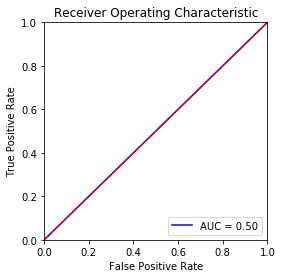

In [34]:
#x_train_final_US = x_train_final.iloc[idx_US,:]
#y_train_US = y_train.iloc[idx_US,:]
plt.rcParams["figure.figsize"] = (4,4)

fpr, tpr, threshold = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [10]:
data_obj = data_all.select_dtypes(include=['object']).copy().\
iloc[:, [ 0,  1,  3,  6,  8,  9, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22]]
data_num = data_all.select_dtypes(include=['int64']).copy()

In [11]:
#final = pd.concat([data_num_pd, data_obj], axis = 1, ignore_index=True)
final_dummy = pd.get_dummies(data_obj)
x_train_final = final_dummy.iloc[:(4500638),:]
x_test_final = final_dummy.iloc[(4500638):,:]


In [12]:
x_train_final.shape

(4500638, 168)

In [13]:
pickle_out = open("x_train_obj.pickle","wb")
pickle.dump(x_train_final, pickle_out)
pickle_out.close()

In [14]:
pickle_out = open("x_test_obj.pickle","wb")
pickle.dump(x_test_final, pickle_out)
pickle_out.close()

### Random undersamping

In [15]:
US = RandomUnderSampler(return_indices=True)
x_train_final_US, y_train_US, idx_US = US.fit_sample(x_train_final, y_train)

In [16]:
x_train_final_US.shape

(29678, 168)

### Random forest

In [19]:
model1 = Pipeline([ 
    ('selectK',  SelectKBest(score_func=mutual_info_classif)),  
    ('rf', RandomForestClassifier())
])



In [20]:
model1.fit(x_train_final_US, y_train_US)

Pipeline(memory=None,
     steps=[('selectK', SelectKBest(k=10, score_func=<function mutual_info_classif at 0x1175947b8>)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurit...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [21]:
model1.get_params()

{'memory': None,
 'rf': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 'rf__bootstrap': True,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'auto',
 'rf__max_leaf_nodes': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_impurity_split': None,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__n_estimators': 10,
 'rf__n_jobs': 1,
 'rf__oob_score': False,
 'rf__random_state': None,
 'rf__verbose': 0,
 'rf__warm_start': False,
 'selectK': SelectKBest(k=10, score_func=<function mutual_info_classif at 0x1175947b8>

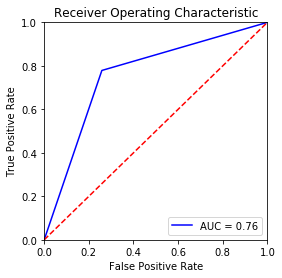

In [22]:
#x_train_final_US = x_train_final.iloc[idx_US,:]
#y_train_US = y_train.iloc[idx_US,:]
#model1.fit(x_train_final_US, y_train_US)
y_test_pred = model1.predict(x_test_final)
plt.rcParams["figure.figsize"] = (4,4)

fpr, tpr, threshold = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision tree

In [24]:
model2 = Pipeline([ 
    ('selectK',  SelectKBest(score_func=mutual_info_classif)),  
    ('tree', DecisionTreeClassifier())
])



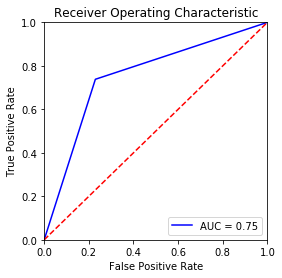

In [25]:
#x_train_final_US = x_train_final.iloc[idx_US,:]
#y_train_US = y_train.iloc[idx_US,:]
model2.fit(x_train_final_US, y_train_US)
y_test_pred = model2.predict(x_test_final)
plt.rcParams["figure.figsize"] = (4,4)

fpr, tpr, threshold = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Grid search the best K

In [26]:
N_FEATURES_OPTIONS = [3, 5, 10, 15]
param_grid = [
    {
        'selectK__k': N_FEATURES_OPTIONS,
    },
]

In [27]:
grid = GridSearchCV(model1, param_grid=param_grid, cv=2, n_jobs=1)

In [28]:
grid.fit(x_train_final_US, y_train_US)

GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('selectK', SelectKBest(k=10, score_func=<function mutual_info_classif at 0x1175947b8>)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurit...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'selectK__k': [3, 5, 10, 15]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

report(grid.cv_results_)

Model with rank: 1
Mean validation score: 0.739 (std: 0.007)
Parameters: {'selectK__k': 15}

Model with rank: 2
Mean validation score: 0.735 (std: 0.003)
Parameters: {'selectK__k': 10}

Model with rank: 3
Mean validation score: 0.720 (std: 0.002)
Parameters: {'selectK__k': 3}



In [31]:
y_test_pred = grid.predict(x_test_final)


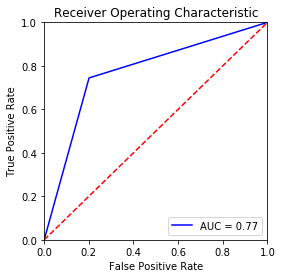

In [32]:
plt.rcParams["figure.figsize"] = (4,4)

fpr, tpr, threshold = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [36]:
N_FEATURES_OPTIONS = [ 35, 45, 55, 65, 75]
param_grid = [
    {
        'selectK__k': N_FEATURES_OPTIONS,
    },
]
grid = GridSearchCV(model1, param_grid=param_grid, cv=2, n_jobs=1)
grid.fit(x_train_final_US, y_train_US)

GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('selectK', SelectKBest(k=10, score_func=<function mutual_info_classif at 0x1175947b8>)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurit...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'selectK__k': [35, 45, 55, 65, 75]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

report(grid.cv_results_)

Model with rank: 1
Mean validation score: 0.790 (std: 0.001)
Parameters: {'selectK__k': 65}

Model with rank: 2
Mean validation score: 0.789 (std: 0.000)
Parameters: {'selectK__k': 75}

Model with rank: 3
Mean validation score: 0.786 (std: 0.002)
Parameters: {'selectK__k': 55}



In [38]:
y_test_pred = grid.predict(x_test_final)


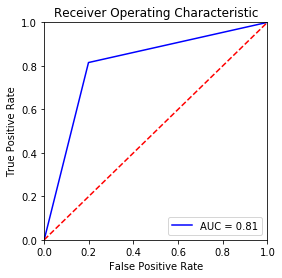

In [39]:
plt.rcParams["figure.figsize"] = (4,4)

fpr, tpr, threshold = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
pickle_out = open("under_sampling_idx.pickle","wb")
pickle.dump(idx_US, pickle_out)
pickle_out.close()